
                           PROCJECT 4 - ENSEMBLE TECHNIQUES
    
    Using the collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes = True)
import random
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import kurtosis, skew, stats
from math import sqrt
from numpy import mean, var
from sklearn import metrics,preprocessing
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import scipy.stats as stats
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA

# Introduction

In [2]:
df = pd.read_csv('bank-full.csv')

In [3]:
#Creating User Columns
df_user = pd.DataFrame(np.arange(0,len(df)), columns=['user'])
df = pd.concat([df_user, df], axis=1)

In [4]:
df.dtypes

user          int32
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

Data Analysis

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
user         45211 non-null int32
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int32(1), int64(7), object(10)
memory usage: 6.0+ MB


In [6]:
df.head(5)

,user,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
df.columns.values

array(['user', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'Target'],
      dtype=object)

In [8]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,Target
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [9]:
df.describe()

,user,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22605.000000,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,0.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11302.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,22605.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33907.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45210.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
df.groupby('Target').mean()

,user,age,balance,day,duration,campaign,pdays,previous
Target,,,,,,,,
no,21197.503081,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,33228.953867,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [11]:
df['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

In [12]:
countNo = len(df[df.Target == 'no'])
countYes = len(df[df.Target == 'yes'])
print('Percentage of "No": {:.3f}%'. format((countNo/(len(df.Target))*100)))
print('Percentage of "Yes": {:.3f}%'. format((countYes/(len(df.Target))*100)))

Percentage of "No": 88.302%
Percentage of "Yes": 11.698%


Note below how Dataset is unbalanced



# VISUALIZATION

In [13]:
#Visualize the Categorical feature distribution and relation with target variable. let’s create a User Defined function
def Categorical_Grapgh(data,catfeature,distributionName):
    fig, ax = plt.subplots()
    fig.set_size_inches(20, 8)
    sns.countplot(x = catfeature, data = data)
    ax.set_xlabel(catfeature, fontsize=15)
    ax.set_ylabel('Count', fontsize=15)
    ax.set_title(distributionName, fontsize=15)
    ax.tick_params(labelsize=15)
    sns.despine()

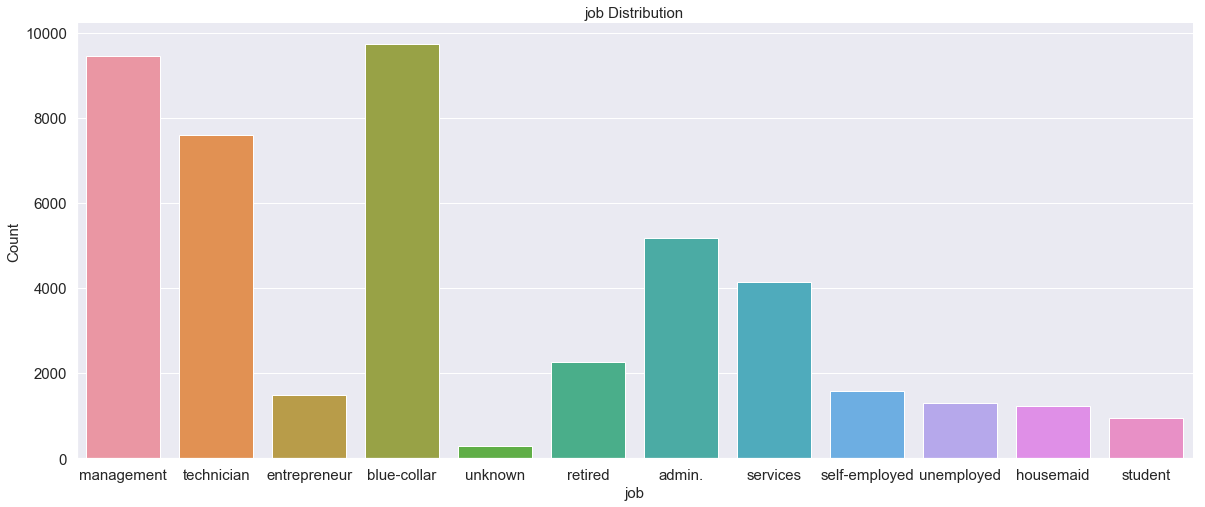

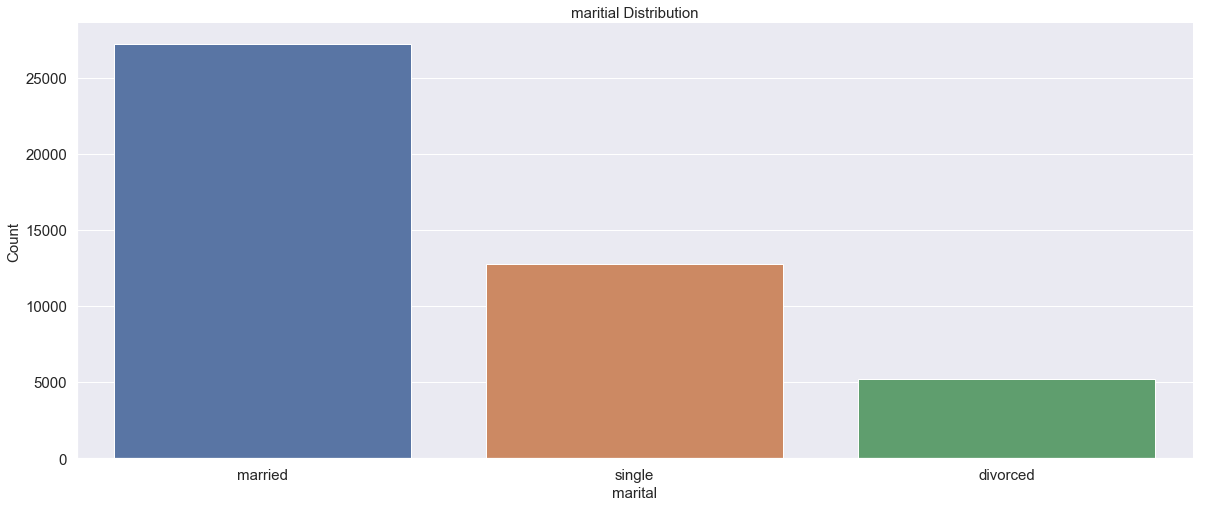

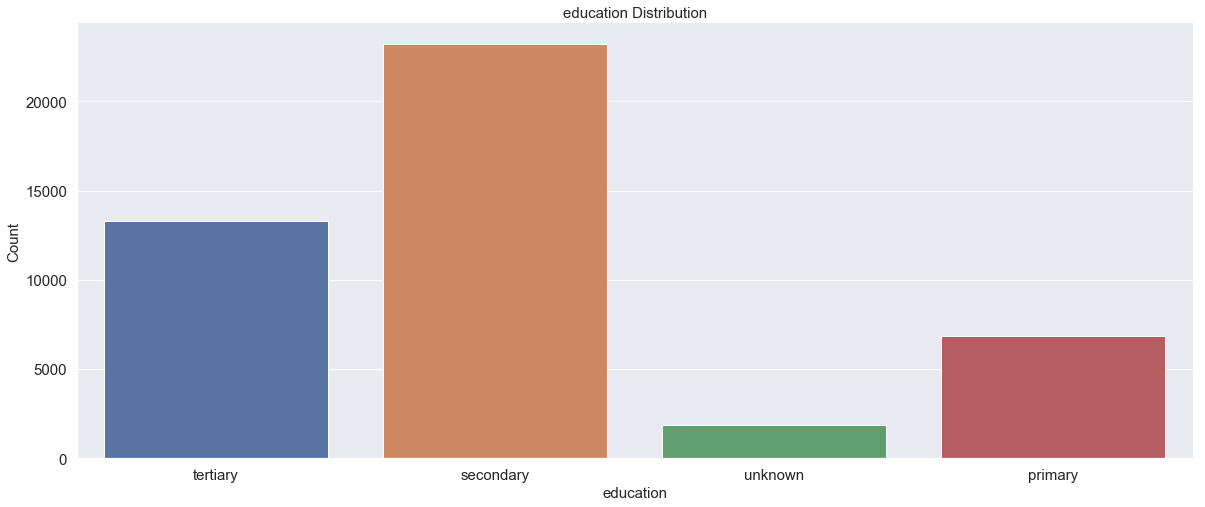

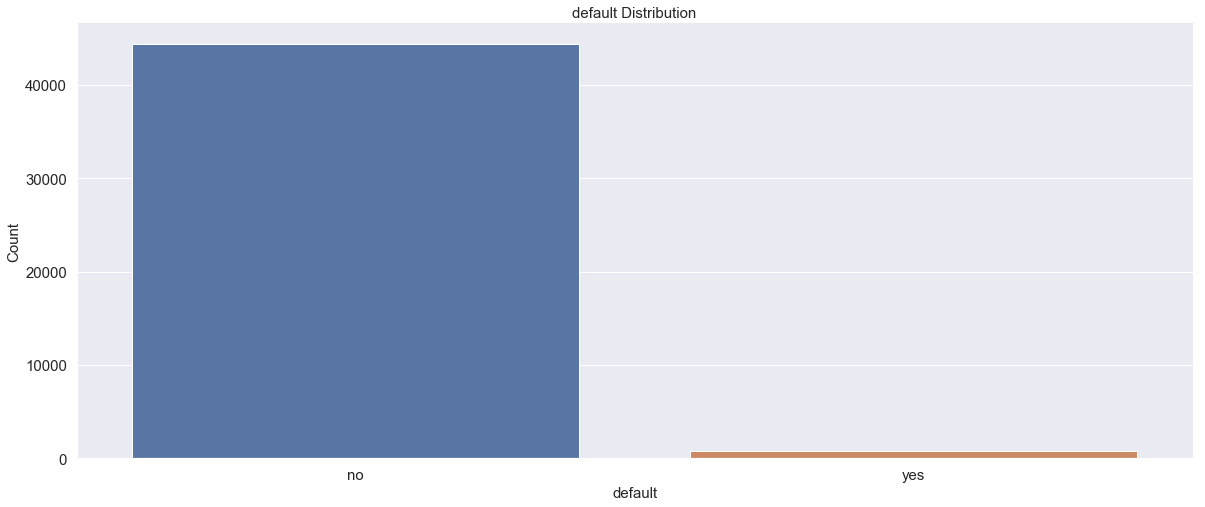

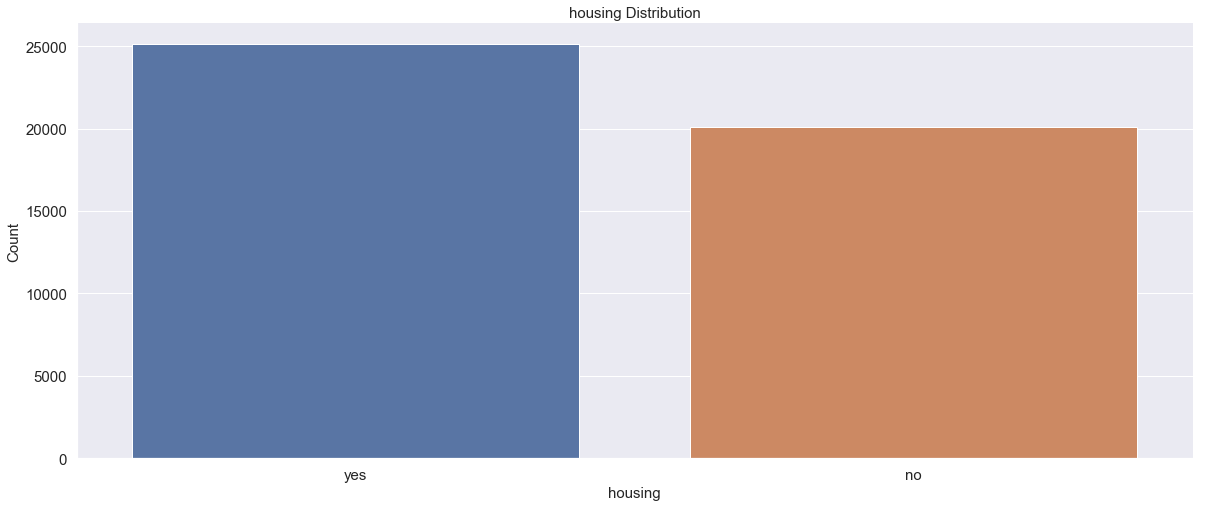

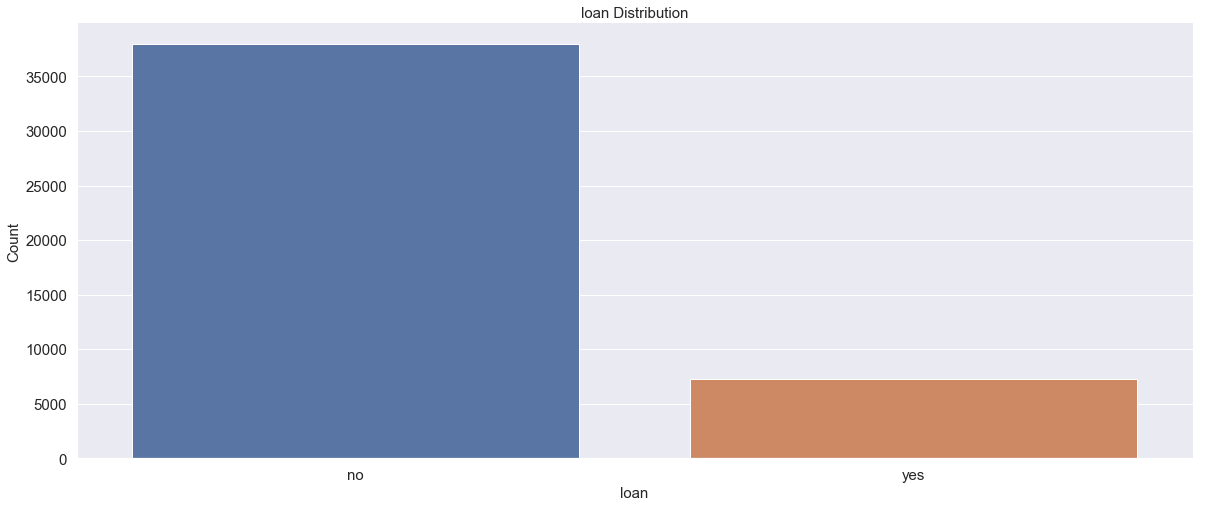

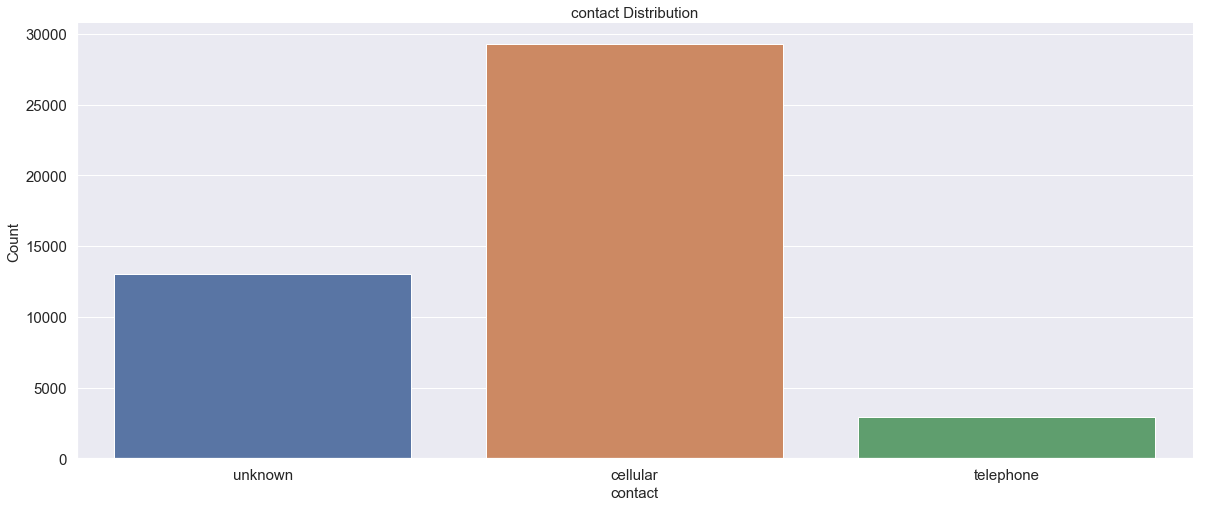

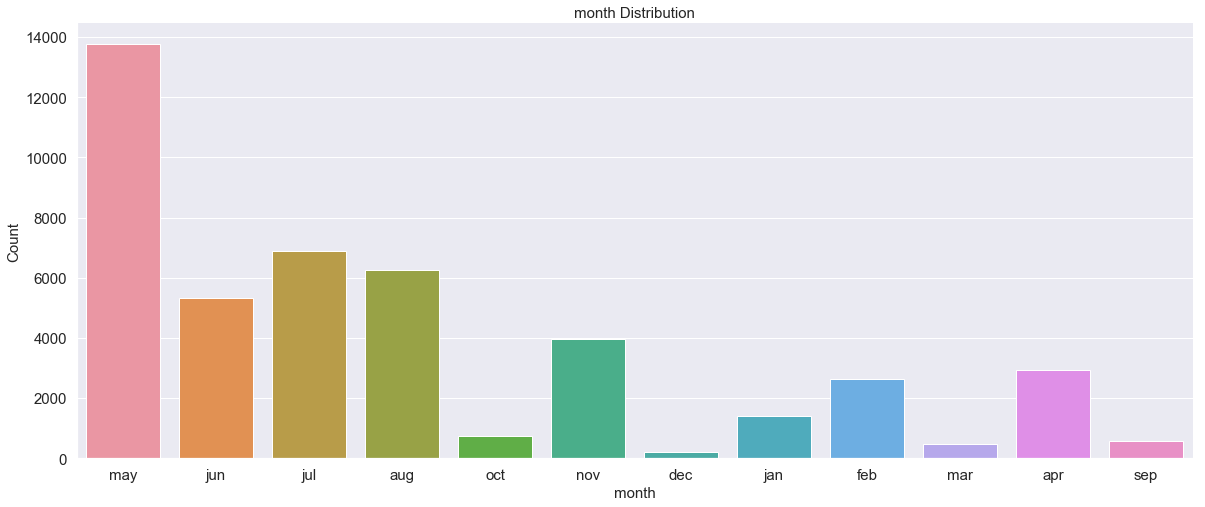

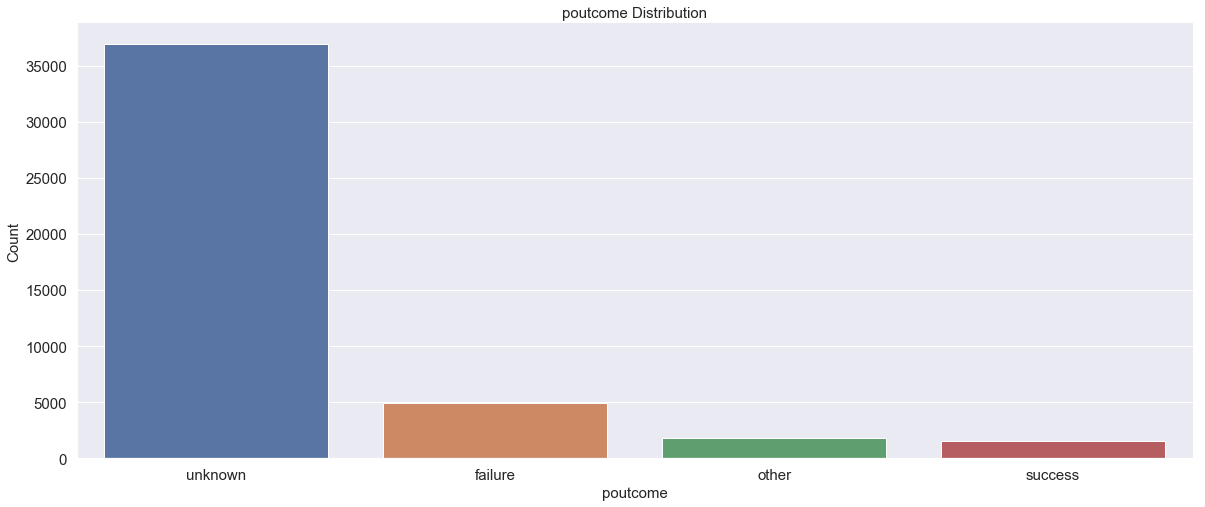

In [14]:
Categorical_Grapgh(df,'job','job Distribution')
Categorical_Grapgh(df,'marital','maritial Distribution')
Categorical_Grapgh(df,'education','education Distribution')
Categorical_Grapgh(df,'default','default Distribution')
Categorical_Grapgh(df,'housing','housing Distribution')
Categorical_Grapgh(df,'loan','loan Distribution')
Categorical_Grapgh(df,'contact','contact Distribution')
Categorical_Grapgh(df,'month','month Distribution')
Categorical_Grapgh(df,'poutcome','poutcome Distribution')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C2B6B38>,
      dtype=object)

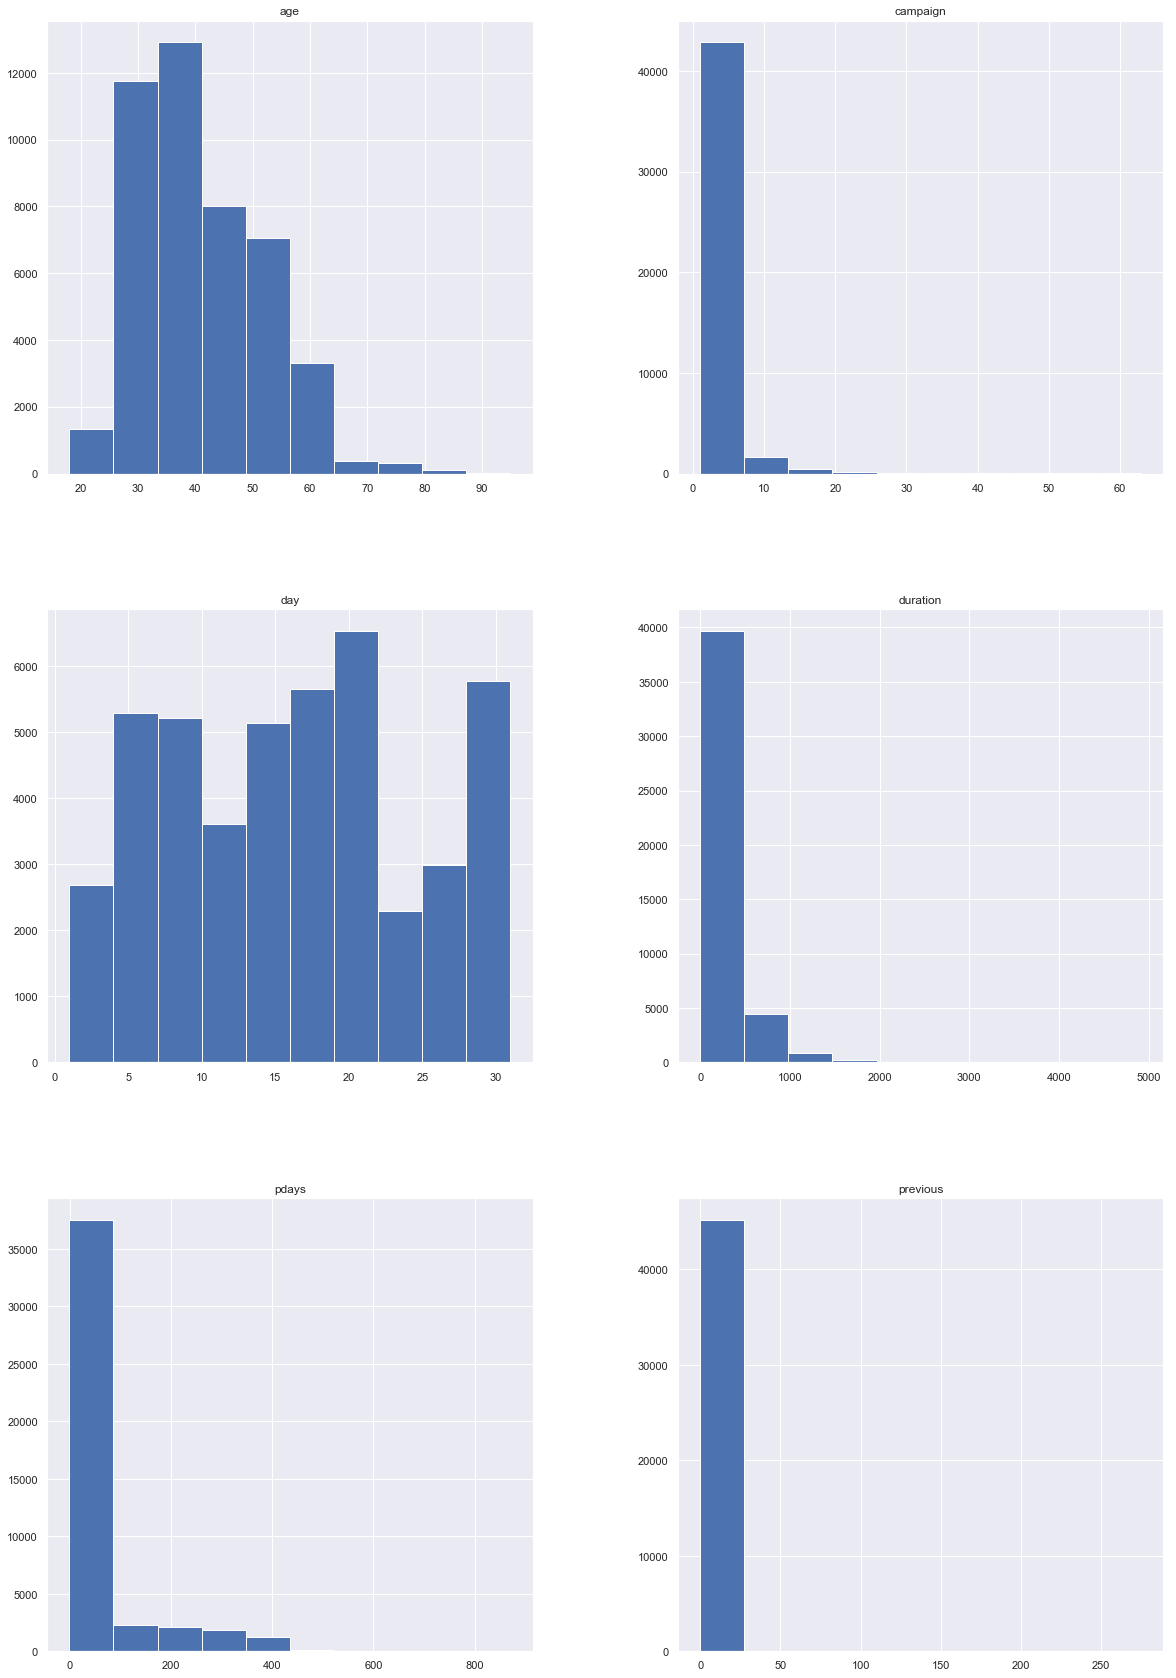

In [15]:
#Visaualization on numerical attributes.
DF=df[['age', 'day','duration','campaign','pdays','previous','poutcome']]
DF.hist(figsize=(20,30))

In [16]:
DF=df[['age', 'day','duration','campaign','pdays','previous','poutcome']] #Created a new data frame that has only 3 columns 'bmi', 'age','charges'.
print("Skewness")
DF.skew()

Skewness


age          0.684818
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

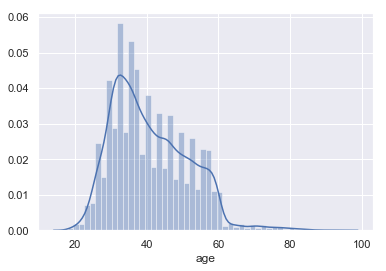

In [17]:
sns.distplot(df['age'])

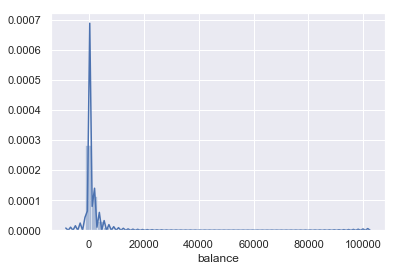

In [18]:
sns.distplot(df['balance'])

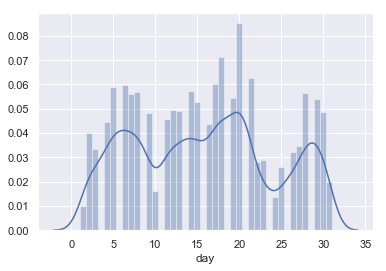

In [19]:
sns.distplot(df['day'])

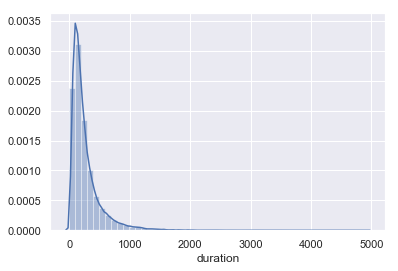

In [20]:
sns.distplot(df['duration'])

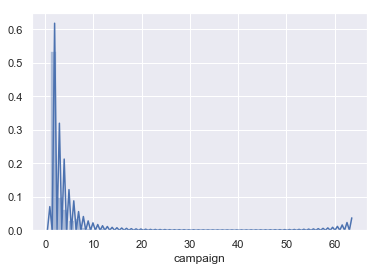

In [21]:
sns.distplot(df['campaign'])

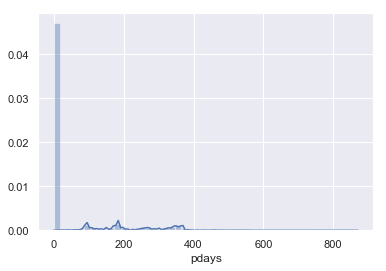

In [22]:
sns.distplot(df['pdays'])

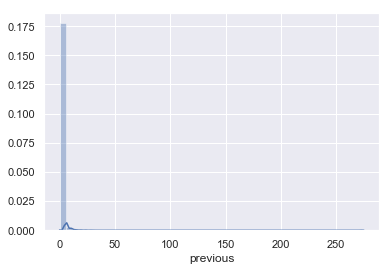

In [23]:
sns.distplot(df['previous'])

Verifying Null Values

In [24]:
#Check if any missing value in any of the feature
df.isnull().values.any()

False

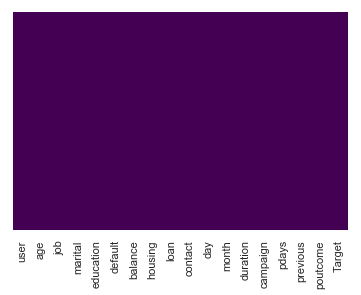

In [25]:
#Verifying null values
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [26]:
df.isna().sum()

user         0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

Checking Out liers

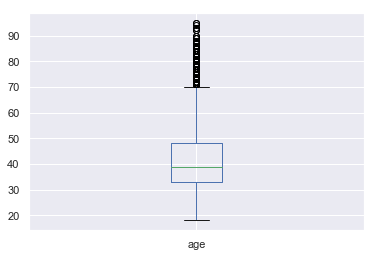

In [27]:
# Check outlier if any for Numberic column.
df.age.plot(kind='box')
# There are outlier and check max age and age greater than 80

In [28]:
print(df.age.max())
df[df['age'] > 80].head(100)

95


,user,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
29158,29158,83,retired,married,primary,no,425,no,no,telephone,2,feb,912,1,-1,0,unknown,no
29322,29322,83,retired,married,tertiary,no,6236,no,no,cellular,2,feb,283,2,-1,0,unknown,no
31051,31051,83,retired,single,primary,no,3349,no,no,telephone,12,feb,89,1,-1,0,unknown,no
31055,31055,85,retired,married,primary,no,12114,no,no,telephone,12,feb,165,2,-1,0,unknown,yes
31069,31069,90,retired,divorced,secondary,no,1,no,no,cellular,13,feb,152,3,-1,0,unknown,yes
31089,31089,82,retired,married,tertiary,no,278,no,no,cellular,16,feb,223,7,-1,0,unknown,no
31130,31130,85,retired,divorced,primary,no,7613,no,no,cellular,18,feb,355,3,-1,0,unknown,yes
31233,31233,94,retired,divorced,secondary,no,1234,no,no,cellular,3,mar,212,1,-1,0,unknown,no
31261,31261,83,retired,divorced,primary,no,1097,no,no,telephone,5,mar,181,1,-1,0,unknown,yes
31365,31365,83,retired,married,secondary,no,0,no,no,cellular,18,mar,140,10,-1,0,unknown,no


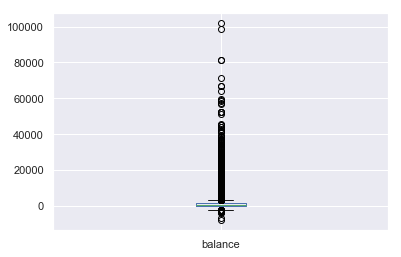

In [29]:
df.balance.plot(kind='box')

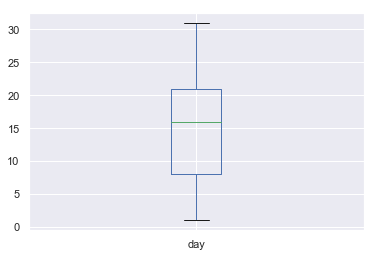

In [30]:
df.day.plot(kind='box')

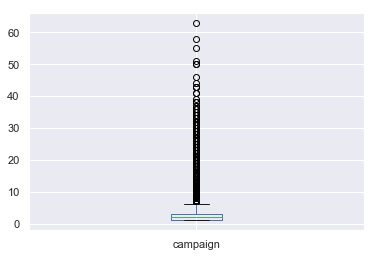

In [31]:
df.campaign.plot(kind='box')
# lot of exreme values.

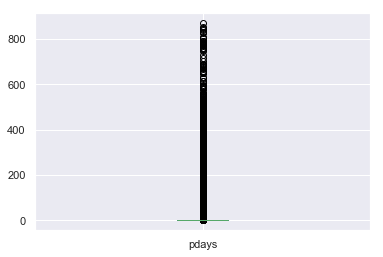

In [32]:
df.pdays.plot(kind='box')
#sems Box plot is not applicable here 

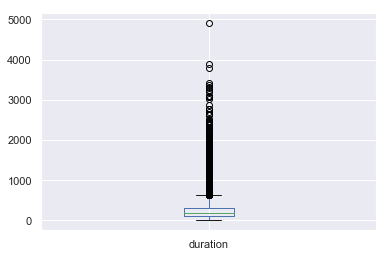

In [33]:

df.duration.plot(kind='box')

#sems Box plot is not applicable here

Define X and y

In [34]:
#Define X and y
X = df.drop(['Target','user','job','marital', 'education', 'contact', 
             'housing', 'loan', 'day', 'month', 'poutcome' ], axis=1)
y = df['Target']

Get Dummies Values

In [35]:
X = pd.get_dummies(X)
y = pd.get_dummies(y)

Dummy Trap

Dummy Variable Trap can influence negatively in our analyses. Dummy Variable trap is a scenario in which the independent variables are multicollinear - a scenario in which two or more variables are highly correlated; in simple terms, one variable can be predicted from the others. 

In [36]:
X.columns
X = X.drop(['default_no'], axis= 1)
X = X.rename(columns = {'default_yes': 'default'})
y.columns
y = y.drop(['yes'], axis=1)
y = y.rename(columns= {'no': 'y'})


# Visualising Data

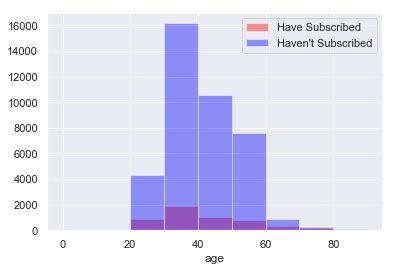

In [37]:
#Age group
bins = range(0, 100, 10)
ax = sns.distplot(df.age[df.Target=='yes'],
              color='red', kde=False, bins=bins, label='Have Subscribed')
sns.distplot(df.age[df.Target=='no'],
         ax=ax,  # Overplots on first plot
         color='blue', kde=False, bins=bins, label="Haven't Subscribed")
plt.legend()
plt.show()

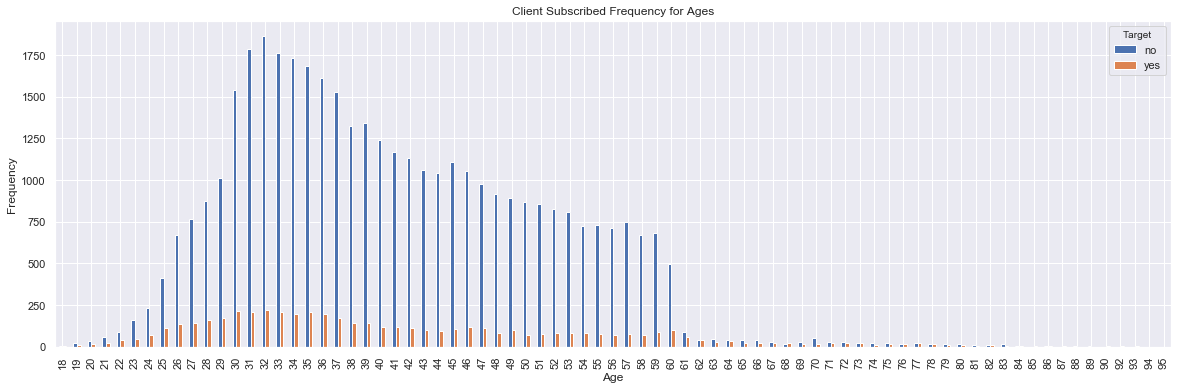

In [38]:
#Age
pd.crosstab(df.age,df.Target).plot(kind="bar",figsize=(20,6))
plt.title('Client Subscribed Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

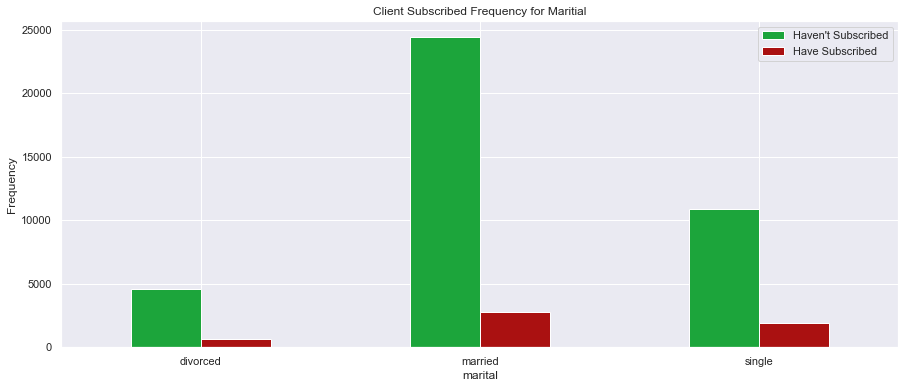

In [39]:
pd.crosstab(df.marital,df.Target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Client Subscribed Frequency for Maritial')
plt.xlabel('marital')
plt.xticks(rotation=0)
plt.legend(["Haven't Subscribed", "Have Subscribed"])
plt.ylabel('Frequency')
plt.show()

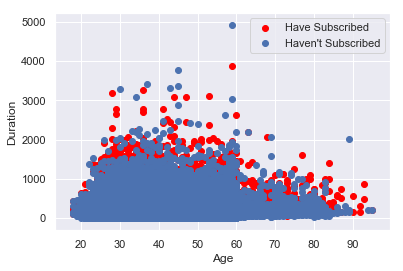

In [40]:
plt.scatter(x=df.age[df.Target=='yes'], y=df.duration[(df.Target=='yes')], c="red")
plt.scatter(x=df.age[df.Target=='no'], y=df.duration[(df.Target=='no')])
plt.legend(["Have Subscribed", "Haven't Subscribed"])
plt.xlabel("Age")
plt.ylabel("Duration")
plt.show()

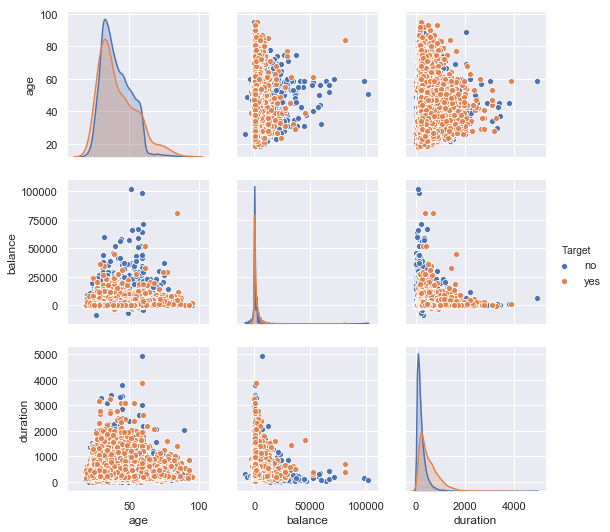

In [41]:
sns.pairplot(data=df, hue='Target', vars= ['age', 'balance', 'duration'])

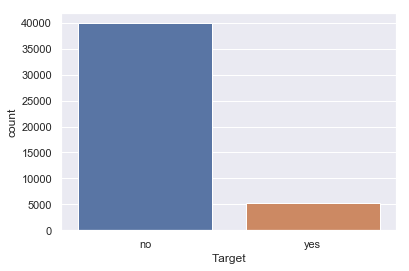

In [42]:
sns.countplot(x='Target', data=df, label='Count')

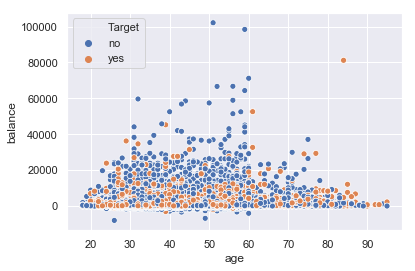

In [43]:
sns.scatterplot(x='age', y='balance',hue='Target', data=df)

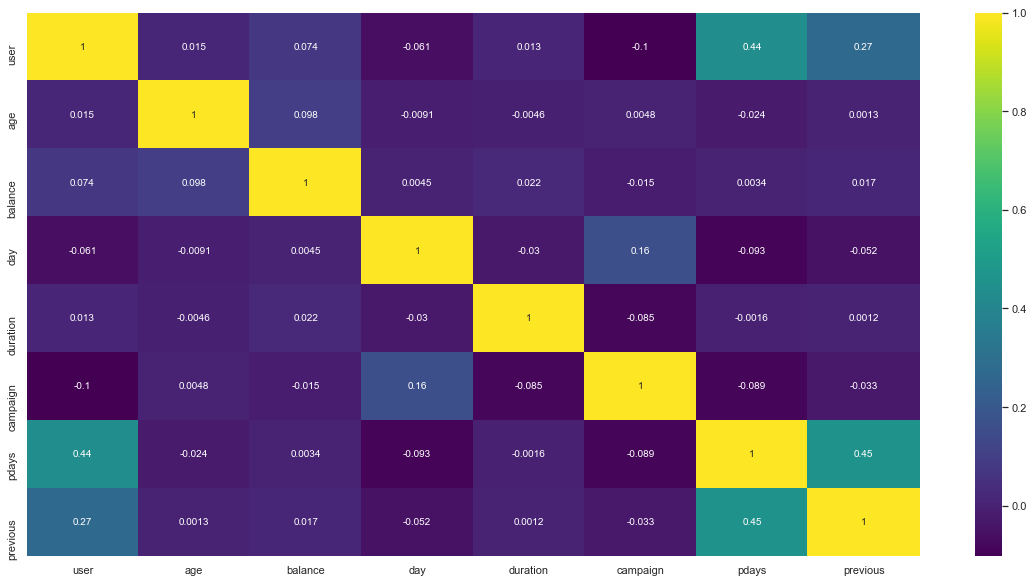

In [44]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df.corr(), annot=True, cmap='viridis')

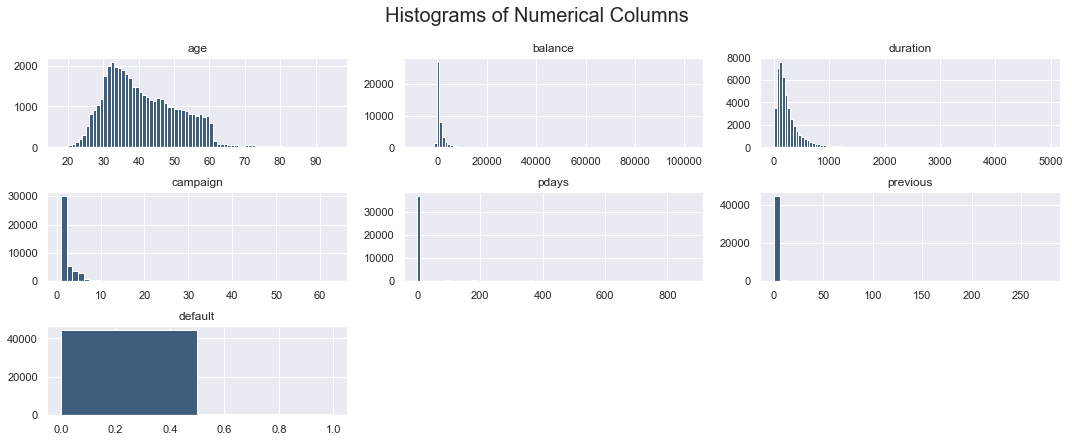

In [45]:
df2 = X
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(df2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(df2.columns.values[i])

    vals = np.size(df2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(df2.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

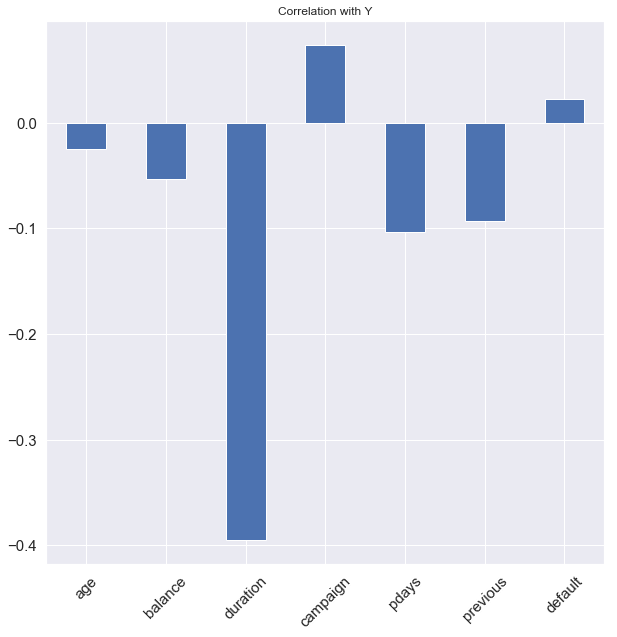

In [46]:
## Correlation with independent Variable 
df2.corrwith(y.y).plot.bar(
        figsize = (10, 10), title = "Correlation with Y", fontsize = 15,
        rot = 45, grid = True)

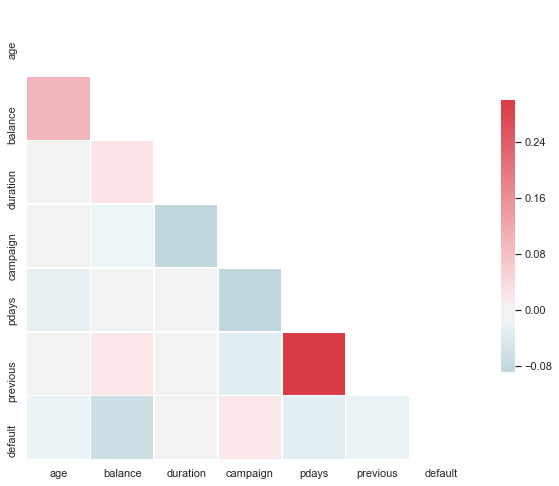

In [47]:
## Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = df2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

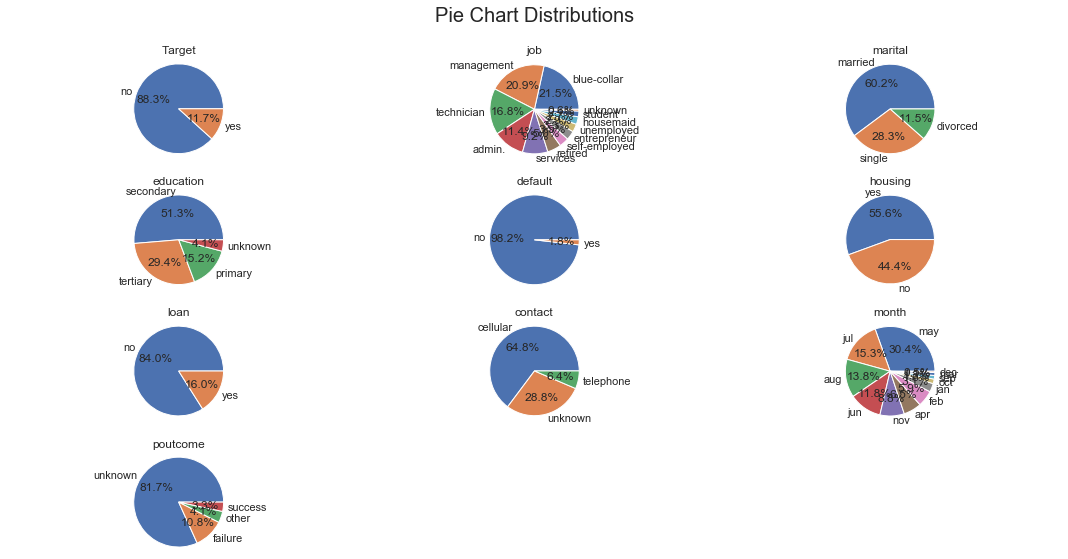

In [48]:
## Pie Plots
df.columns
df2 = df[['Target','job','marital', 'education', 'default', 'housing','loan', 'contact',
             'month', 'poutcome'
                    ]]
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, df2.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(df2.columns.values[i - 1])
   
    values = df2.iloc[:, i - 1].value_counts(normalize = True).values
    index = df2.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Splitting the Dataset into Training Set and Test Set

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [50]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(36168, 7) (9043, 7) (36168, 1) (9043, 1)


# Balancing the Traing Set

The Training Set is unbalanced. And so become necessary to organize it.

In [51]:
y_train['y'].value_counts()

1    31937
0     4231
Name: y, dtype: int64

In [52]:
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

random.seed(0)
higher = np.random.choice(higher, size=len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))

X_train = X_train.loc[new_indexes]
y_train = y_train.loc[new_indexes]

In [53]:
y_train['y'].value_counts()

1    4231
0    4231
Name: y, dtype: int64

# Feature Scaling


In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = pd.DataFrame(sc.fit_transform(X_train))
X_test2 = pd.DataFrame(sc.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

F:\anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
F:\anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
F:\anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


# Model Building
Comparing Models

In [55]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'l1')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[ 736  322]
 [1528 6457]]


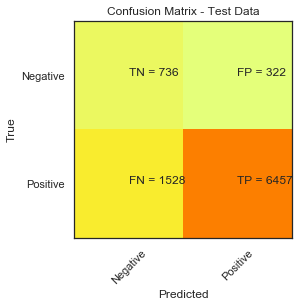

In [57]:
plt.clf()
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True')
plt.xlabel('Predicted')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(confusion_matrix[i][j]))
plt.show()


In [58]:
total=sum(sum(confusion_matrix))

sensitivity1 = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity1 )

specificity1 = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity1)

Sensitivity :  0.3250883392226148
Specificity :  0.9525003687859567


Advantages of Logistic regression.

1. Logistic Regression performs well when the dataset is linearly separable.
2. Logistic regression is less prone to over-fitting but it can overfit in high dimensional datasets. You should consider Regularization (L1 and L2) techniques to avoid over-fitting in these scenarios.
3. Logistic Regression not only gives a measure of how relevant a predictor (coefficient size) is, but also its direction of association (positive or negative).
4. Logistic regression is easier to implement, interpret and very efficient to train. 

Disadvantages of Logistic Regression
1. Main limitation of Logistic Regression is the assumption of linearity between the dependent variable and the independent variables. In the real world, the data is rarely linearly separable. Most of the time data would be a jumbled mess.
2. If the number of observations are lesser than the number of features, Logistic Regression should not be used, otherwise it may lead to overfit.
3. Logistic Regression can only be used to predict discrete functions. Therefore, the dependent variable of Logistic Regression is restricted to the discrete number set. This restriction itself is problematic, as it is prohibitive to the prediction of continuous data.

In [59]:
## K-Nearest Neighbors (K-NN)
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=15, metric='minkowski', p= 2)
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['K-Nearest Neighbors (minkowski)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

F:\anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[ 836  222]
 [1849 6136]]


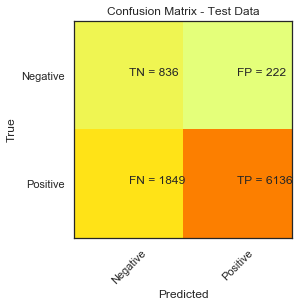

In [61]:
plt.clf()
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True')
plt.xlabel('Predicted')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(confusion_matrix[i][j]))
plt.show()


In [62]:
total=sum(sum(confusion_matrix))

sensitivity1 = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity1 )

specificity1 = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity1)

Sensitivity :  0.31135940409683427
Specificity :  0.9650833595470274


Advantages of KNN

1. No Training Period: KNN is called Lazy Learner (Instance based learning). It does not learn anything in the training period. It does not derive any discriminative function from the training data. In other words, there is no training period for it. It stores the training dataset and learns from it only at the time of making real time predictions. This makes the KNN algorithm much faster than other algorithms that require training e.g. SVM, Linear Regression etc.
2. Since the KNN algorithm requires no training before making predictions, new data can be added seamlessly which will not impact the accuracy of the algorithm.
3. KNN is very easy to implement. There are only two parameters required to implement KNN i.e. the value of K and the distance function (e.g. Euclidean or Manhattan etc.)

Disadvantages of KNN

1. Does not work well with large dataset: In large datasets, the cost of calculating the distance between the new point and each existing points is huge which degrades the performance of the algorithm.
2. Does not work well with high dimensions: The KNN algorithm doesn't work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate the distance in each dimension.
3. Need feature scaling: We need to do feature scaling (standardization and normalization) before applying KNN algorithm to any dataset. If we don't do so, KNN may generate wrong predictions.
4. Sensitive to noisy data, missing values and outliers: KNN is sensitive to noise in the dataset. We need to manually impute missing values and remove outliers.

In [63]:
## SVM (Linear)
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'linear', probability= True)
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

F:\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[ 735  323]
 [1494 6491]]


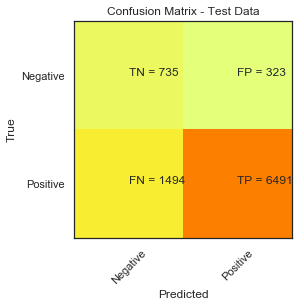

In [65]:

plt.clf()
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True')
plt.xlabel('Predicted')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(confusion_matrix[i][j]))
plt.show()

In [66]:


total=sum(sum(confusion_matrix))

sensitivity1 = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity1 )

specificity1 = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity1)

Sensitivity :  0.3297442799461642
Specificity :  0.9525975931904902


In [67]:
## SVM (rbf)
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'rbf', probability= True)
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (RBF)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

F:\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[ 855  203]
 [1809 6176]]


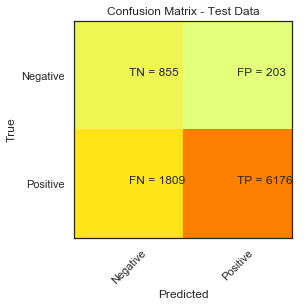

In [69]:
plt.clf()
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True')
plt.xlabel('Predicted')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(confusion_matrix[i][j]))
plt.show()


In [70]:
total=sum(sum(confusion_matrix))

sensitivity1 = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity1 )

specificity1 = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity1)

Sensitivity :  0.32094594594594594
Specificity :  0.9681768302241731


Advantages of Support Vector Machine (SVM)
1. Regularization capabilities: SVM has L2 Regularization feature. So, it has good generalization capabilities which prevent it from over-fitting.
2. Handles non-linear data efficiently: SVM can efficiently handle non-linear data using Kernel trick.
3. Solves both Classification and Regression problems: SVM can be used to solve both classification and regression problems. SVM is used for classification problems while SVR (Support Vector Regression) is used for regression problems.
4. Stability: A small change to the data does not greatly affect the hyperplane and hence the SVM. So the SVM model is stable.


Disadvantages of Support Vector Machine (SVM)
1. Choosing an appropriate Kernel function is difficult: Choosing an appropriate Kernel function (to handle the non-linear data) is not an easy task. It could be tricky and complex. In case of using a high dimension Kernel, you might generate too many support vectors which reduce the training speed drastically. 
2. Extensive memory requirement: Algorithmic complexity and memory requirements of SVM are very high. You need a lot of memory since you have to store all the support vectors in the memory and this number grows abruptly with the training dataset size.
3. Requires Feature Scaling: One must do feature scaling of variables before applying SVM.
4. Long training time: SVM takes a long training time on large datasets.
5. Difficult to interpret: SVM model is difficult to understand and interpret by human beings unlike Decision Trees.

In [71]:
## Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Naive Bayes (Gaussian)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

F:\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [72]:

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[ 718  340]
 [1704 6281]]


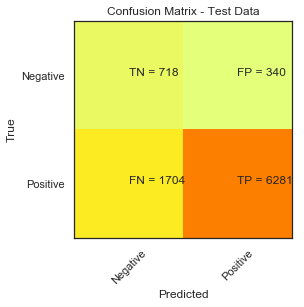

In [73]:
plt.clf()
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True')
plt.xlabel('Predicted')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(confusion_matrix[i][j]))
plt.show()

In [74]:


total=sum(sum(confusion_matrix))

sensitivity1 = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity1 )

specificity1 = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity1)

Sensitivity :  0.29644921552436004
Specificity :  0.9486482404470624


Advantages of Naive Bayes
1. When assumption of independent predictors holds true, a Naive Bayes classifier performs better as compared to other models.
2. Naive Bayes requires a small amount of training data to estimate the test data. So, the training period is less.
3. Naive Bayes is also easy to implement.


Disadvantages of Naive Bayes

1. Main imitation of Naive Bayes is the assumption of independent predictors. Naive Bayes implicitly assumes that all the attributes are mutually independent. In real life, it is almost impossible that we get a set of predictors which are completely independent.
2. If categorical variable has a category in test data set, which was not observed in training data set, then model will assign a 0 (zero) probability and will be unable to make a prediction. This is often known as Zero Frequency. To solve this, we can use the smoothing technique. One of the simplest smoothing techniques is called Laplace estimation.

In [75]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

#Predicting the best set result
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [76]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)


[[ 777  281]
 [2311 5674]]


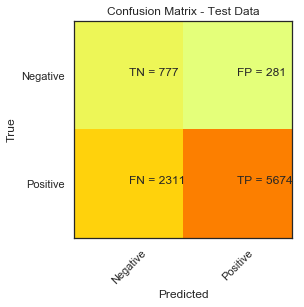

In [77]:
plt.clf()
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True')
plt.xlabel('Predicted')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(confusion_matrix[i][j]))
plt.show()

In [78]:
total=sum(sum(confusion_matrix))

sensitivity1 = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity1 )

specificity1 = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity1)

Sensitivity :  0.25161917098445596
Specificity :  0.9528127623845508


Advantages of Decision Tress:
    
1.Compared to other algorithms decision trees requires less effort for data preparation during pre-2.processing.

3.A decision tree does not require normalization of data.

4.A decision tree does not require scaling of data as well.

5.Missing values in the data also does NOT affect the process of building decision tree to any considerable extent.

6.A Decision trees model is very intuitive and easy to explain to technical teams as well as stakeholders.

Disadvantages of Decision Tress:
    
1.A small change in the data can cause a large change in the structure of the decision tree causing instability.
For a Decision tree sometimes calculation can go far more complex compared to other algorithms.

2.Decision tree often involves higher time to train the model.

3.Decision tree training is relatively expensive as complexity and time taken is more.

4.Decision Tree algorithm is inadequate for applying regression and predicting continuous values.

In [79]:
## Random Forest Gini (n=100)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'gini')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest Gini (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

F:\anaconda\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [80]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)


[[ 868  190]
 [1922 6063]]


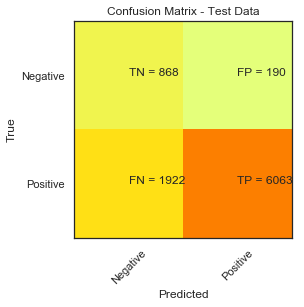

In [81]:
plt.clf()
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True')
plt.xlabel('Predicted')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(confusion_matrix[i][j]))
plt.show()

In [82]:
total=sum(sum(confusion_matrix))

sensitivity1 = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity1 )

specificity1 = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity1)

Sensitivity :  0.3111111111111111
Specificity :  0.9696145849992004


In [83]:
## Random Forest Gini (n=200)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 200,
                                    criterion = 'gini')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest Gini (n=200)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

F:\anaconda\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [84]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[ 865  193]
 [1916 6069]]


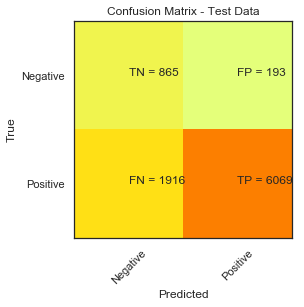

In [85]:
plt.clf()
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True')
plt.xlabel('Predicted')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(confusion_matrix[i][j]))
plt.show()

In [86]:
total=sum(sum(confusion_matrix))

sensitivity1 = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity1 )

specificity1 = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity1)

Sensitivity :  0.31103919453434015
Specificity :  0.9691791759821143


In [87]:
## Random Forest Gini (n=300)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 300,
                                    criterion = 'gini')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest Gini (n=300)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

F:\anaconda\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [88]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[ 869  189]
 [1892 6093]]


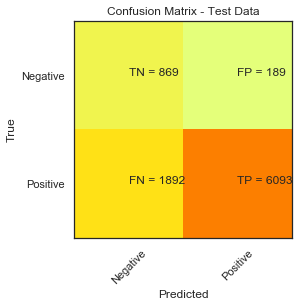

In [89]:


plt.clf()
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True')
plt.xlabel('Predicted')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(confusion_matrix[i][j]))
plt.show()


In [90]:

total=sum(sum(confusion_matrix))

sensitivity1 = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity1 )

specificity1 = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity1)

Sensitivity :  0.3147410358565737
Specificity :  0.9699140401146131


In [91]:
## Random Forest Entropy (n=100)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest Entropy (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

F:\anaconda\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [92]:

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[ 874  184]
 [1922 6063]]


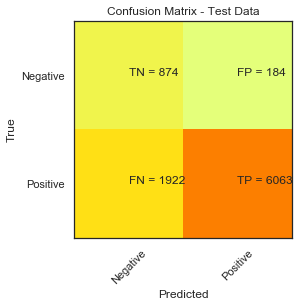

In [93]:

plt.clf()
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True')
plt.xlabel('Predicted')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(confusion_matrix[i][j]))
plt.show()

In [94]:

total=sum(sum(confusion_matrix))

sensitivity1 = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity1 )

specificity1 = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity1)

Sensitivity :  0.31258941344778257
Specificity :  0.9705458620137666


In [95]:
## Random Forest Entropy (n=200)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 200,
                                    criterion = 'entropy')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest Entropy (n=200)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

F:\anaconda\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [96]:

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[ 864  194]
 [1902 6083]]


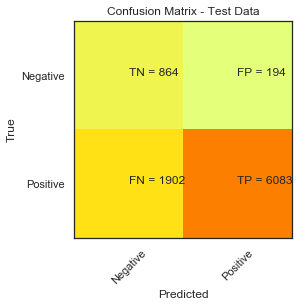

In [97]:
plt.clf()
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True')
plt.xlabel('Predicted')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(confusion_matrix[i][j]))
plt.show()


In [98]:
## Random Forest Entropy (n=300)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 300,
                                    criterion = 'entropy')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest Entropy (n=300)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

F:\anaconda\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [99]:

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[ 860  198]
 [1898 6087]]


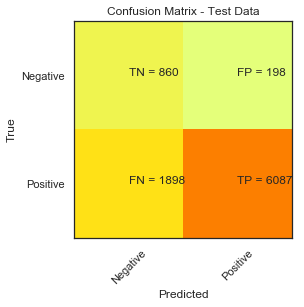

In [100]:
plt.clf()
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True')
plt.xlabel('Predicted')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(confusion_matrix[i][j]))
plt.show()

In [101]:


total=sum(sum(confusion_matrix))

sensitivity1 = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity1 )

specificity1 = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity1)

Sensitivity :  0.3118201595358956
Specificity :  0.9684964200477327


Advantages of Random Forest

1. Random Forest is based on the bagging algorithm and uses Ensemble Learning technique. It creates as many trees on the subset of the data and combines the output of all the trees. In this way it reduces overfitting problem in decision trees and also reduces the variance and therefore improves the accuracy.
2. Random Forest can be used to solve both classification as well as regression problems.
3. Random Forest works well with both categorical and continuous variables.
4. Random Forest can automatically handle missing values.
5. No feature scaling required: No feature scaling (standardization and normalization) required in case of Random Forest as it uses rule based approach instead of distance calculation.

Disadvantages of Random Forest

1. Complexity: Random Forest creates a lot of trees (unlike only one tree in case of decision tree) and combines their outputs. By default, it creates 100 trees in Python sklearn library. To do so, this algorithm requires much more computational power and resources. On the other hand decision tree is simple and does not require so much computational resources.
2. Longer Training Period: Random Forest require much more time to train as compared to decision trees as it generates a lot of trees (instead of one tree in case of decision tree) and makes decision on the majority of votes.

In [102]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.795422,0.952500,0.808641,0.874695
1,K-Nearest Neighbors (minkowski),0.770983,0.965083,0.768441,0.855609
2,SVM (Linear),0.799071,0.952598,0.812899,0.877221
3,SVM (RBF),0.777507,0.968177,0.773450,0.859928
4,Naive Bayes (Gaussian),0.773969,0.948648,0.786600,0.860058
5,Decision Tree,0.713369,0.952813,0.710582,0.814060
6,Random Forest Gini (n=100),0.766449,0.969615,0.759299,0.851665
7,Random Forest Gini (n=200),0.766781,0.969179,0.760050,0.851969
8,Random Forest Gini (n=300),0.769877,0.969914,0.763056,0.854139
9,Random Forest Entropy (n=100),0.767113,0.970546,0.759299,0.852024


Precision: is the ratio TP / (TP + FP) where TP is number of true positives and FP number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.


Recall: is the ratio TP / (TP + FN) where TP is the number of true positives and FN number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.


F-score: can be interpreted as a weighted harmonic mean of the precision and recall, where an F score reaches its best value at 1 and worst score at 0. The F score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall.

In [103]:
# Formatting Final Results
user_identifier = df['user']
final_results = pd.concat([y_test, user_identifier], axis = 1).dropna()
final_results['predicted'] = y_pred
final_results = final_results[['user', 'y', 'predicted']].reset_index(drop=True)

In [104]:
final_results.head()

,user,y,predicted
0,5,1.0,0
1,11,1.0,1
2,20,1.0,1
3,21,1.0,0
4,26,1.0,1


Lasso Regression

Lasso Regression performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces.
It imposes a constraint on the model parameters that causes regression coefficients for some variables to shrink towards zero.

In [105]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)


In [106]:
x=df.iloc[:,0:42]
y=df['Target']

In [107]:
y.value_counts()

0    39922
1     5289
Name: Target, dtype: int64

In [108]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .3, random_state=99,stratify=y) 

In [109]:
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test",x_test.shape)
print("y_test",y_test.shape)

x_train: (31647, 18)
y_train: (31647,)
x_test (13564, 18)
y_test (13564,)


In [110]:
from sklearn import linear_model

clf = linear_model.Lasso(alpha=0.5)
clf.fit(x_train,y_train) 
print("Coefficients:",clf.coef_)
print("Intercept:",clf.intercept_)

Coefficients: [ 7.13137991e-06  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  7.46800143e-06 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  5.34503376e-04 -0.00000000e+00 -5.00126662e-05  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
Intercept: -0.19426396298161053


We can see from the output above that the coefficients of certain variables have been reduced to zero.

# Ridge Regression

In [111]:
x=df.iloc[:,0:42]
y=df['Target']

In [112]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .3, random_state=99,stratify=y)

In [113]:
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test",x_test.shape)
print("y_test",y_test.shape)

x_train: (31647, 18)
y_train: (31647,)
x_test (13564, 18)
y_test (13564,)


In [114]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(x_train, y_train) 


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [115]:
clf.predict(x_test)

array([ 2.59303279e-05,  2.57631331e-05,  3.17089253e-05, ...,
        1.47294757e-05, -1.85858030e-06, -6.64708205e-06])

In [116]:
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha': [3.175, 3.77, 4.823]}
ridge_regressor=GridSearchCV(ridge, parameters,cv=5)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [3.175, 3.77, 4.823]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [117]:
print("Best parameter:", ridge_regressor.best_params_)
print("Best score:",ridge_regressor.best_score_)


Best parameter: {'alpha': 3.175}
Best score: 0.9999979553614028


In [118]:
x=df.iloc[:,0:42]
y=df['Target']

In [119]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .2, random_state=10) 

In [120]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg5=LogisticRegression()
logreg_cv=GridSearchCV(logreg5,grid,cv=10)
logreg_cv.fit(x_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklea

F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklea

F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklea

F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklea

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l1'}
accuracy : 1.0


F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


logreg5

In [121]:
logreg5

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [122]:
logreg6=LogisticRegression(C=1,penalty="l1")
logreg6.fit(x_train,y_train)
print("Score:",logreg6.score(x_test,y_test))

Score: 1.0


F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Conclusion
As observed, the Bank Marketing Dataset is unbalanced.There are outliers in many of the columns And so become tough to perform pretty well the model. For this case, perhaps more data as well as data balancing and scaling can help balance the dataset and trying to find one best final result.The SVM (Linear) was the most powerful method for our model as shown below when model comarison was done .

*********************************  THE END **********************************************

                                                                  Submitted by : Ankita Jaodand